<a href="https://colab.research.google.com/github/harshvs4/YoLoV3/blob/main/YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/YoloV3.zip

In [3]:
#!unzip /content/gdrive/MyDrive/customdata.zip -d /content/YoloV3

In [3]:
!cp -r /content/gdrive/MyDrive/weights /content/YoloV3/

In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [5]:
ls

gdrive/  sample_data/  YoloV3/


In [6]:
cd YoloV3/

/content/YoloV3


In [7]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [8]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(epochs=3, batch_size=3, accumulate=4, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-23 09:01:59.488364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 09:02:00.404564: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; 

In [9]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(epochs=300, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-23 09:03:04.208804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 09:03:05.121658: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or direc

In [10]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='out_out', img_size=512, conf_thres=0.1, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/20 data/customdata/images/img001.jpg: 512x512 1 walles, Done. (0.043s)
image 2/20 data/customdata/images/img002.jpg: 320x512 1 walles, Done. (0.032s)
image 3/20 data/customdata/images/img003.jpg: 384x512 1 wa

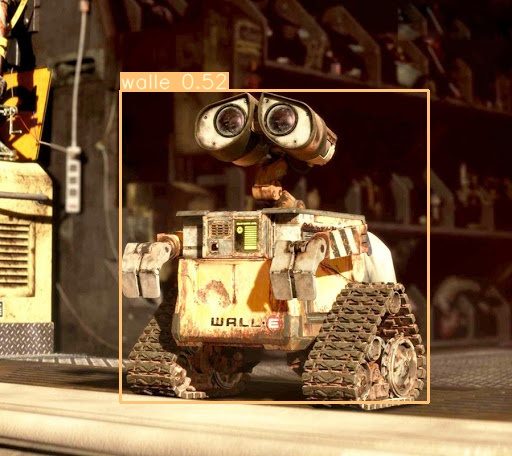

In [11]:
Image(filename='out_out/img001.jpg', width=600)

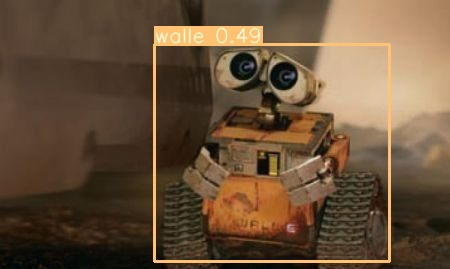

In [12]:
Image(filename='out_out/img002.jpg', width=600)

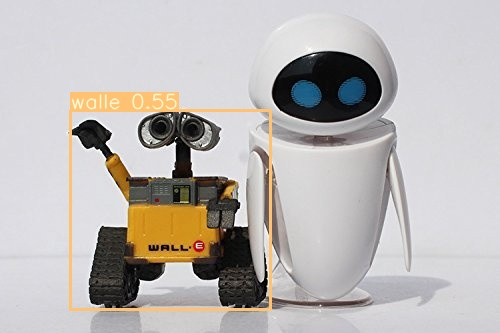

In [13]:
Image(filename='out_out/img003.jpg', width=600)

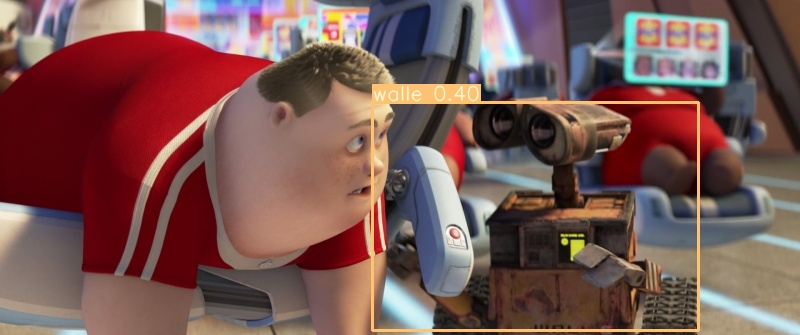

In [14]:
Image(filename='out_out/img020.jpg', width=600)